<a href="https://colab.research.google.com/github/Supratik27/Covid_Data_analysis/blob/main/Covid19_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis(EDA) of covid 19 data

---



---



In this analysis we will try to find if there is any relationship between spread of virus in country and how happy the people living in that country

---



In [50]:
#Importing the Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#Importing the covid 19 dataset
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Data Analysis/covid19_Confirmed_dataset.csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [25]:
data.shape

(266, 104)

In [26]:
#We will do the data cleaning by deleting the useless columns
df = data.drop(["Lat","Long"],axis=1, inplace= True)
data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [27]:
#Aggregating the rows by country
corona_data_aggregated = data.groupby("Country/Region").sum()
corona_data_aggregated.head()

<ipython-input-27-99aa78a9094b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corona_data_aggregated = data.groupby("Country/Region").sum()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [28]:
corona_data_aggregated.shape

(187, 100)

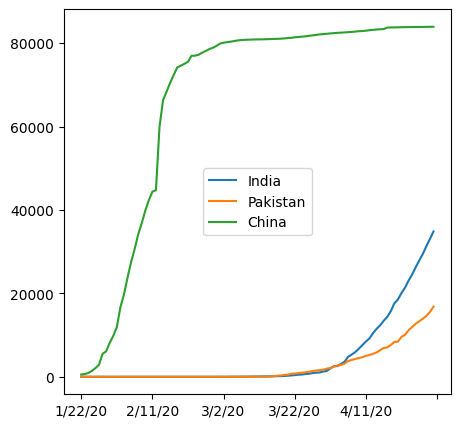

In [29]:
#Visualizing data related to Top 3 populated of Asia
plt.figure(figsize=((5,5)))
corona_data_aggregated.loc["India"].plot()
corona_data_aggregated.loc["Pakistan"].plot()
corona_data_aggregated.loc["China"].plot()
plt.legend()


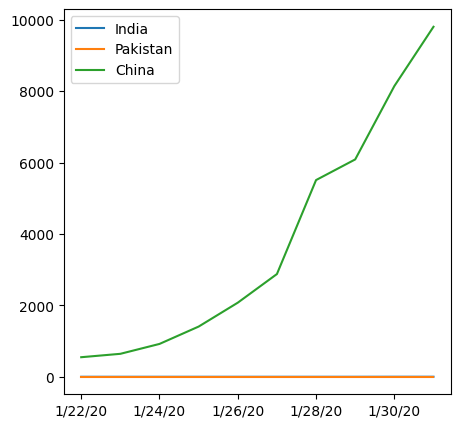

In [30]:
#The infection rate for first 4 months
plt.figure(figsize=((5,5)))
corona_data_aggregated.loc["India"][:10].plot()
corona_data_aggregated.loc["Pakistan"][:10].plot()
corona_data_aggregated.loc["China"][:10].plot()
plt.legend()

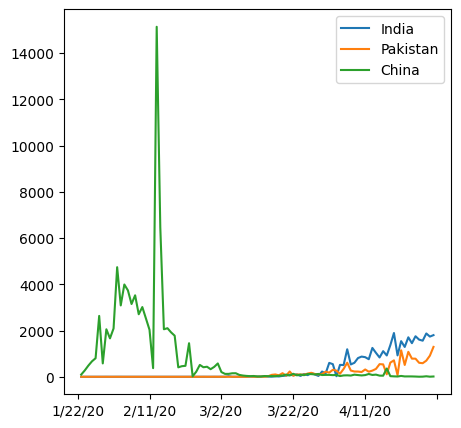

In [31]:
#Calculating the first derivative of the curves
plt.figure(figsize=((5,5)))
corona_data_aggregated.loc["India"].diff().plot()
corona_data_aggregated.loc["Pakistan"].diff().plot()
corona_data_aggregated.loc["China"].diff().plot()
plt.legend()

In [32]:
print("Maximum infection rate of India for the 1st 4 months of Corona:",corona_data_aggregated.loc["India"].diff().max())
print("Maximum infection rate of Pakistan for the 1st 4 months of Corona:",corona_data_aggregated.loc["Pakistan"].diff().max())
print("Maximum infection rate of China for the 1st 4 months of Corona:",corona_data_aggregated.loc["China"].diff().max())


Maximum infection rate of India for the 1st 4 months of Corona: 1893.0
Maximum infection rate of Pakistan for the 1st 4 months of Corona: 1292.0
Maximum infection rate of China for the 1st 4 months of Corona: 15136.0


We will find the maximum infection rate of the 1st 4 months for all the countries

---



In [35]:
countries = list(corona_data_aggregated.index)
max_infection_rate = []
for i in countries:
  max_infection_rate.append(corona_data_aggregated.loc[i].diff().max())

#We will create a column a Max_Infection_Rate on our dataset
corona_data_aggregated["Max_Infection_Rate"] = max_infection_rate
corona_data_aggregated.head()



,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Infection_Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [36]:
#Now we will create a new data frame as max infection per country
Covid_data = pd.DataFrame(corona_data_aggregated["Max_Infection_Rate"])
Covid_data

,Max_Infection_Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [17]:
#Importing the world happiness report
from google.colab import drive
drive.mount('/content/drive')
Happiness_Report = pd.read_csv("/content/drive/MyDrive/Data Analysis/worldwide_happiness_report.csv")
Happiness_Report


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [19]:
#We will do the data cleaning by deleting the useless columns
useless_cols = ["Overall rank", "Score", "Generosity","Perceptions of corruption"]
Happiness_Report.drop(useless_cols, axis=1, inplace=True)
Happiness_Report


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


In [20]:
Happiness_Report.set_index("Country or region", inplace=True)
Happiness_Report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Joining the both dataset

In [53]:
Dataset = Covid_data.join(Happiness_Report, how="inner")
Dataset



,Max_Infection_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [43]:
Dataset.corr() #used to find the pairwise correlation of all columns

,Max_Infection_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_Infection_Rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


**Visualization through graphs**

<Axes: xlabel='GDP per capita', ylabel='Max_Infection_Rate'>

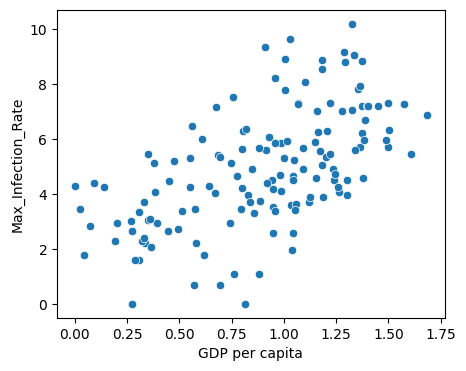

In [75]:
#Plotting Max_Infection_Rate and GDP per capita
x = Dataset["GDP per capita"]
y = Dataset["Max_Infection_Rate"]
plt.figure(figsize=((5,4)))
#Logscaling
sns.scatterplot(data=data,x = Dataset["GDP per capita"],y = np.log(Dataset["Max_Infection_Rate"]))


<Axes: xlabel='GDP per capita', ylabel='Max_Infection_Rate'>

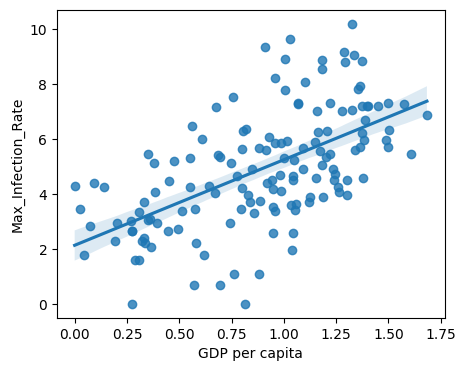

In [79]:
#Regression line
plt.figure(figsize=((5,4)))
sns.regplot(data=data,x = Dataset["GDP per capita"],y =np.log(Dataset["Max_Infection_Rate"]))
#sns.regplot is a method which is used to plot data and a linear regression model fit


<Axes: xlabel='Social support', ylabel='Max_Infection_Rate'>

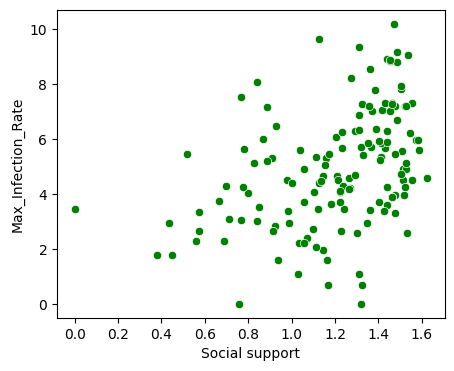

In [93]:
#Plotting Max_Infection_Rate and Social support
x = Dataset["Social support"]
y = Dataset["Max_Infection_Rate"]
plt.figure(figsize=((5,4)))
sns.scatterplot(data=data,x = Dataset["Social support"],y = np.log(Dataset["Max_Infection_Rate"]),color="green")

<Axes: xlabel='Social support', ylabel='Max_Infection_Rate'>

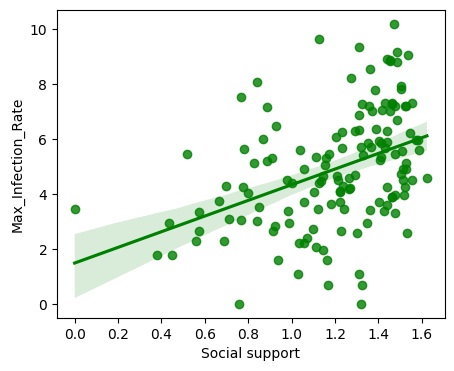

In [92]:
#Regression line
plt.figure(figsize=((5,4)))
sns.regplot(data=data,x = Dataset["Social support"],y =np.log(Dataset["Max_Infection_Rate"]),color="green")


<Axes: xlabel='Healthy life expectancy', ylabel='Max_Infection_Rate'>

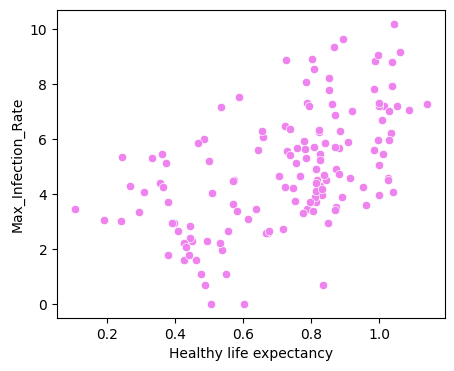

In [94]:
#Plotting Max_Infection_Rate and Healthy life expectance
x = Dataset["Healthy life expectancy"]
y = Dataset["Max_Infection_Rate"]
plt.figure(figsize=((5,4)))
sns.scatterplot(data=data,x = Dataset["Healthy life expectancy"],y = np.log(Dataset["Max_Infection_Rate"]),color="violet")

<Axes: xlabel='Healthy life expectancy', ylabel='Max_Infection_Rate'>

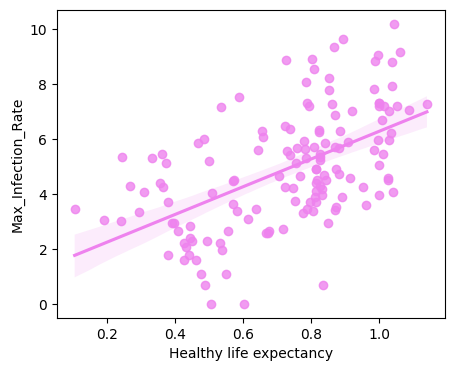

In [96]:
#Regression line
plt.figure(figsize=((5,4)))
sns.regplot(data=data,x = Dataset["Healthy life expectancy"],y =np.log(Dataset["Max_Infection_Rate"]),color="violet")


<Axes: xlabel='Freedom to make life choices', ylabel='Max_Infection_Rate'>

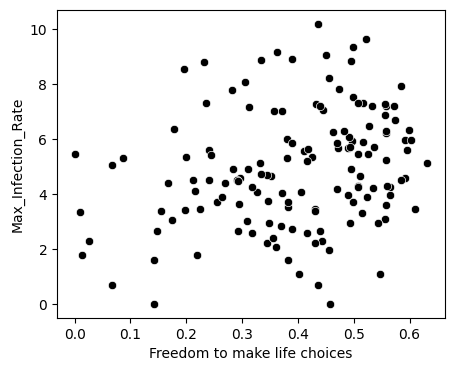

In [97]:
#Plotting Max_Infection_Rate and Freedom to make life choices
x = Dataset["Freedom to make life choices"]
y = Dataset["Max_Infection_Rate"]
plt.figure(figsize=((5,4)))
sns.scatterplot(data=data,x = Dataset["Freedom to make life choices"],y = np.log(Dataset["Max_Infection_Rate"]),color="Black")


<Axes: xlabel='Freedom to make life choices', ylabel='Max_Infection_Rate'>

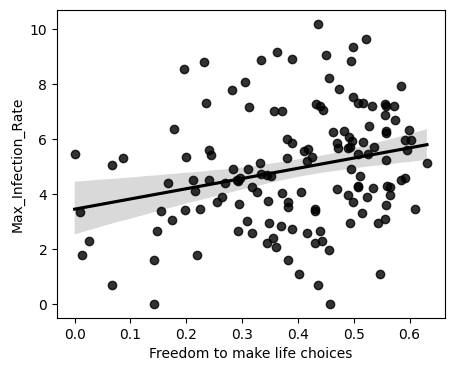

In [98]:
#Regression line
plt.figure(figsize=((5,4)))
sns.regplot(data=data,x = Dataset["Freedom to make life choices"],y =np.log(Dataset["Max_Infection_Rate"]),color="Black")

We can conclude that there is positive correlation between:

*   Max_Infection_Rate and GDP per capita
*   Max_Infection_Rate and Social support

*   Max_Infection_Rate and Healthy life expectance
*   Max_Infection_Rate and Freedom to make life choices



